## Problem Statement - Part I 

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. 

The company wants to know:

 - Which variables are significant in predicting the price of a house, and

 - How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

## Reading and Understanding the data

In [1]:
#import the libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv("train.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Handling null and missing values

In [6]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [7]:
## Checking percentage of null values in columns and grouping columns with high null values together
nullvalues = round(df.isnull().sum()/len(df.index)*100,2)
nullvalues[nullvalues>0].sort_values(ascending=False)


PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

Even though the null values are high in some categorical columns, we will not drop them right away as it might affect the sales price variable.First we impute them with 'None' and then check

In [8]:
#imputing categorical variables with none
null_impute = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_impute:
    df[i].fillna("None",inplace=True)

In [9]:
#checking null values again for numerical columns after categorical data imputation
nullvalues2 = round(df.isnull().sum()/len(df.index)*100,2)
nullvalues2[nullvalues2>0].sort_values(ascending=False)


LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

In [10]:
#imputing the missing values in numerical columns with median
df["LotFrontage"].fillna(df["LotFrontage"].median(),inplace=True)
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(),inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(),inplace=True)

## Data Cleaning

In [11]:
# Dropping the Id column as it will not be required in prediction
df.drop(['Id'],axis=1,inplace=True)

In [12]:
df.shape

(1460, 80)

We will remove any column that has one value repeating more than 85% or 1241 times (1241/1450)*100 = 85%) as this column would be skewed to one value and would have low variance and its better to drop such columns



In [13]:
# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getCategoricalLowVarianceCols():
    column = []
    categorical_columns = df.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getCategoricalLowVarianceCols()

# Remove the columns with skewed data

df.drop(columnsToBeRemoved, axis = 1, inplace = True)

df.shape

(1460, 59)

We will remove any column that has one value repeating more than 85% or 1241 times (1241/1450)*100 = 85%) as this column would be skewed to one value and would have low variance and its better to drop such columns



In [14]:
def getNumericalLowVarianceCols():
    column = []
    numerical_columns = df.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getNumericalLowVarianceCols()
df.drop(columnsToBeRemoved, axis = 1, inplace = True)

In [15]:
df.shape

(1460, 50)

In [16]:
# check again for percentage of null values in each column

percent_missing = round(100*(df.isnull().sum()/len(df.index)), 2)
print(percent_missing)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
LotShape         0.0
LotConfig        0.0
Neighborhood     0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
BsmtQual         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
HeatingQC        0.0
1stFlrSF         0.0
2ndFlrSF         0.0
GrLivArea        0.0
BsmtFullBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
Fence            0.0
MoSold           0.0
YrSold       

No more null values are found in columns after data cleaning

In [17]:
#check for duplicates
df[df.duplicated(keep=False)]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleCondition,SalePrice


No duplicate rows found

### Outlier Check

In [18]:
# Checking outliers at 25%,50%,75%,90%,95% and above

df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,214000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,1.000000,2.000000,1.000000,4.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,10.000000,2010.000000,278000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,1.000000,2.000000,1.000000,4.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,11.000000,2010.000000,326100.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,1418.920000,3123.480000,2.000000,3.000000,1.000000,5.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,12.000000,2010.000000,442567.010000


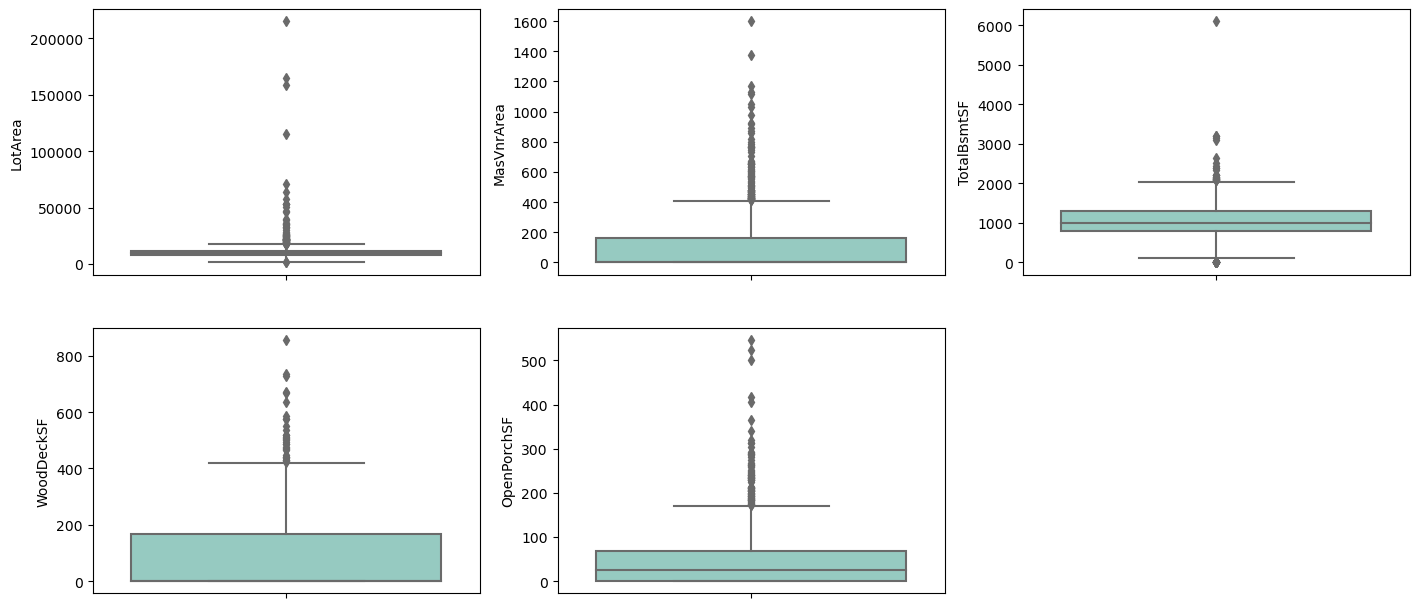

In [19]:
# Check the outliers in some important numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = df)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = df)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = df)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = df)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = df)
plt.show()

In [20]:
#function to find outlier percentage in columns
def OutlierPercentage(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1 
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percentage_outliers = (len(outliers) / len(df)) * 100
    return percentage_outliers

In [21]:
#checking the outlier percentage in the below columns
print(OutlierPercentage('LotArea'))
print(OutlierPercentage('MasVnrArea'))
print(OutlierPercentage('TotalBsmtSF'))
print(OutlierPercentage('WoodDeckSF'))
print(OutlierPercentage('OpenPorchSF'))

4.726027397260274
6.712328767123288
4.178082191780822
2.191780821917808
5.273972602739726


As the outlier percentage is low in the above columns and also since the dataset is small, therefore we will not remove the outliers as we might lose some valuable data

## EDA 

In [22]:
# function to create barplot related to categorical columns

def categorical_bar_plots(column):
    plt.figure(figsize = (16,4))
    plt.subplot(1,2,1)  
    sns.barplot(x = column,y ='SalePrice',data=df) 
    plt.xticks(rotation=45)
    plt.show()

In [23]:
categorical_columns = df.select_dtypes(include=['object'])

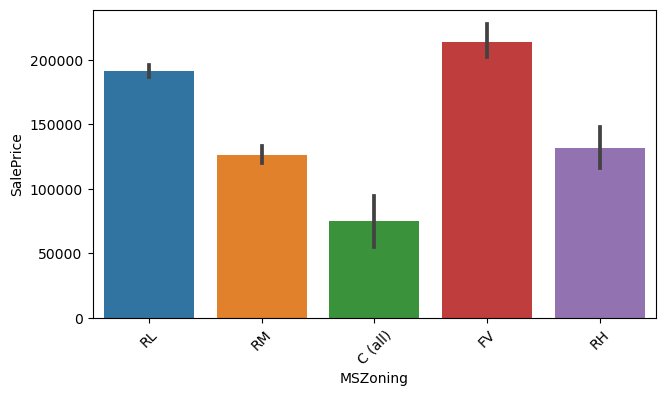

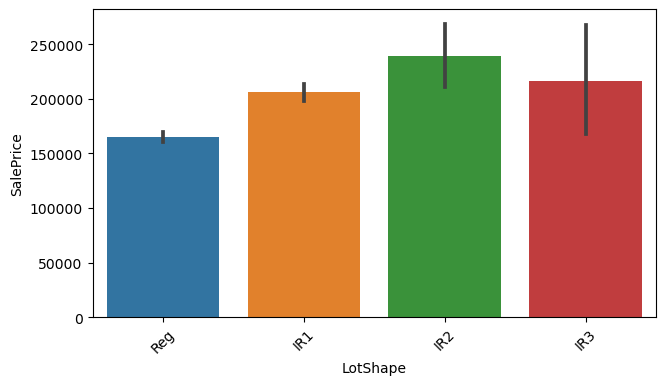

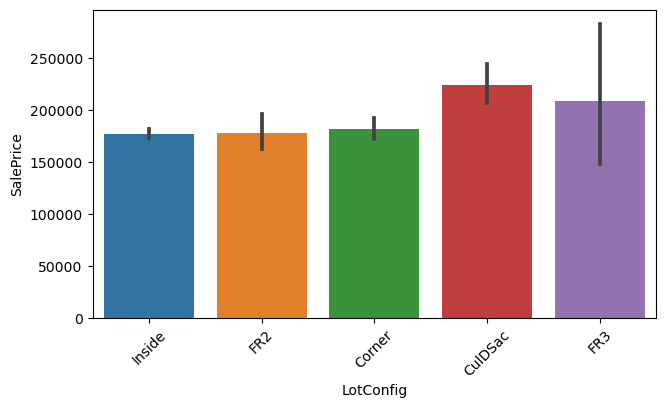

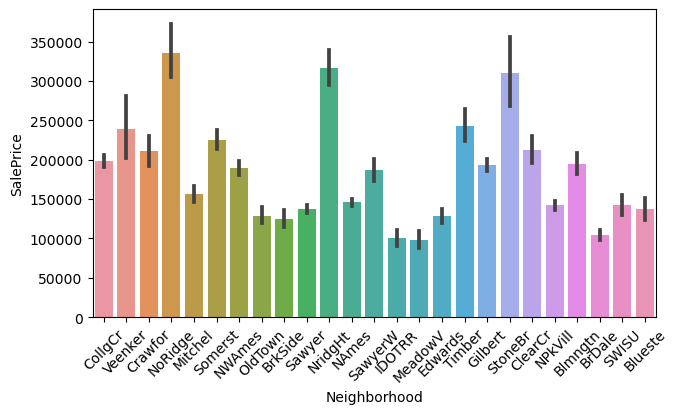

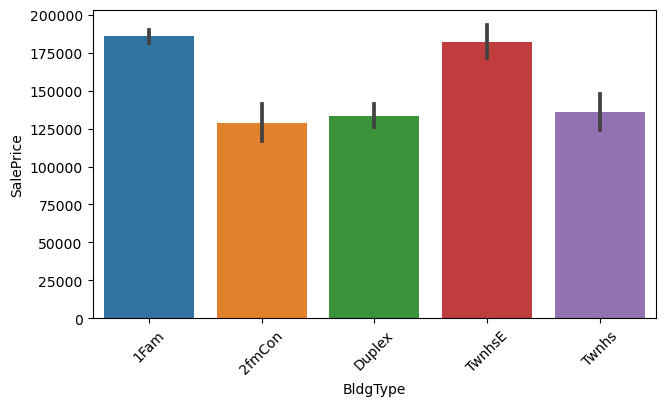

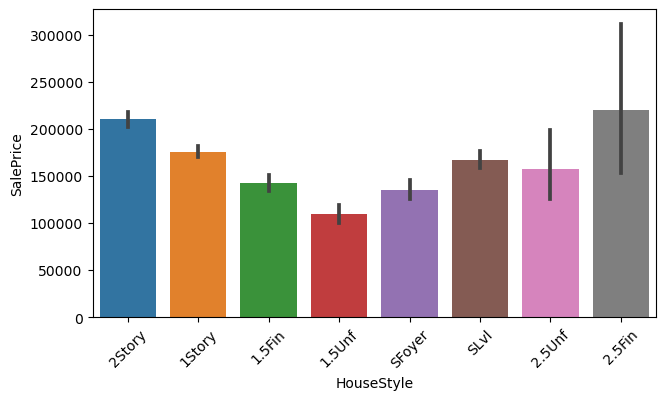

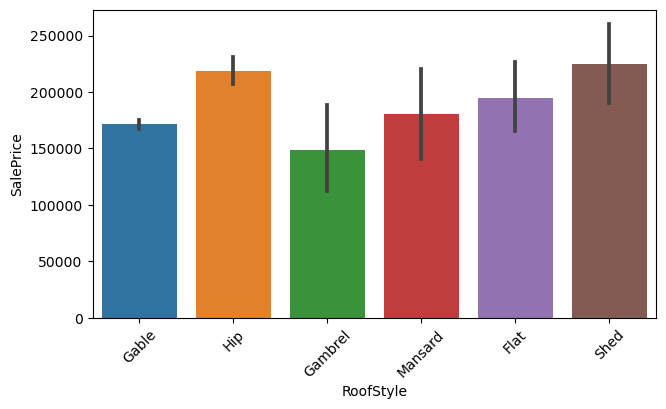

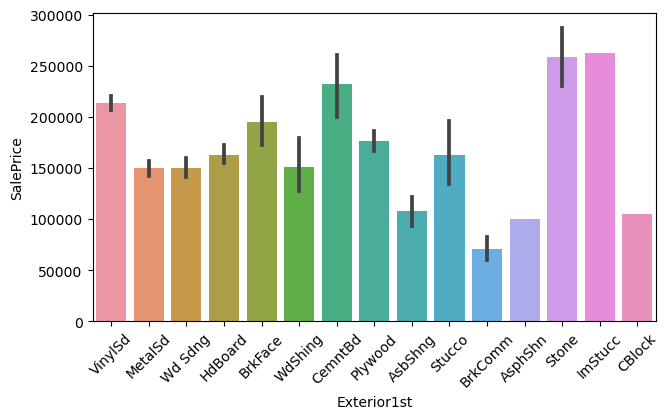

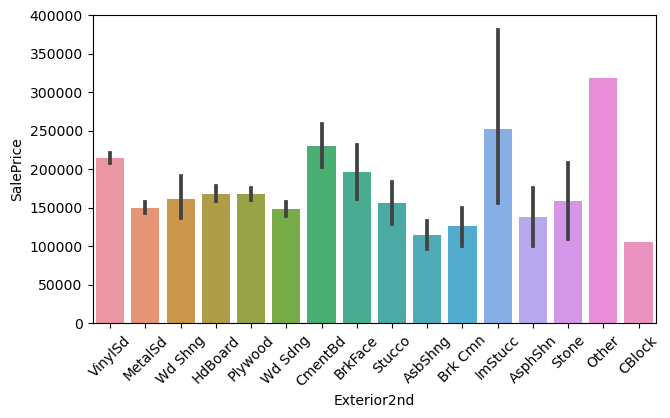

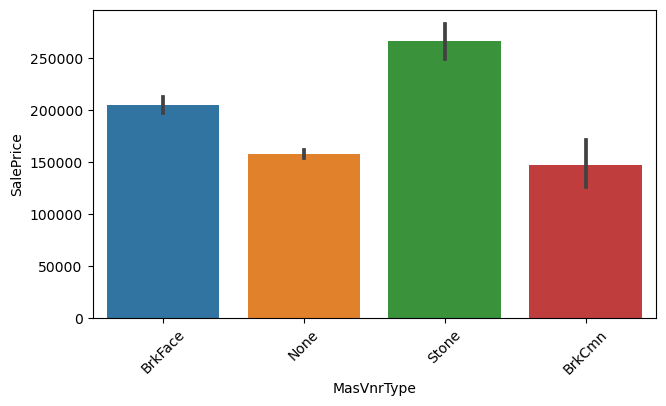

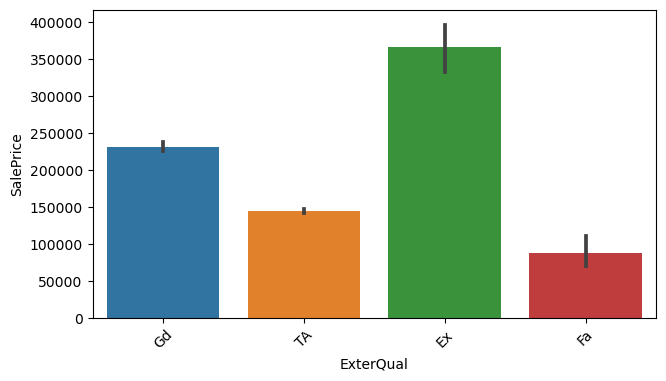

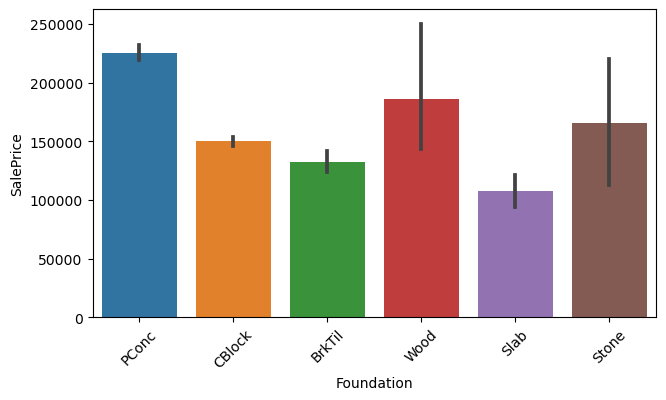

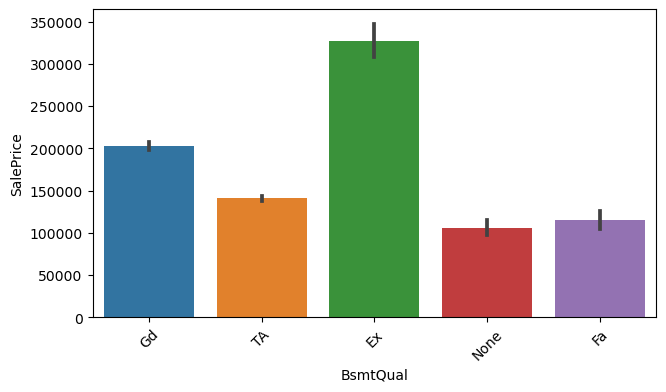

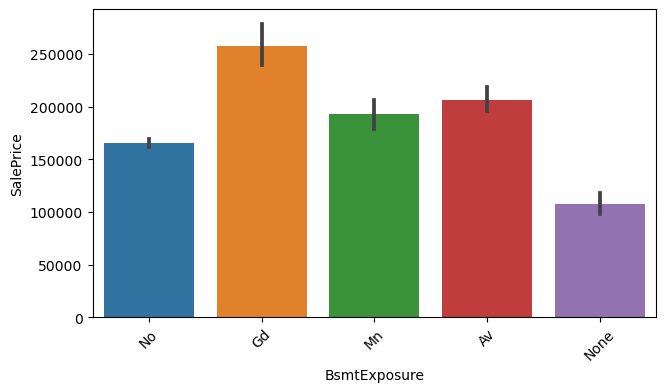

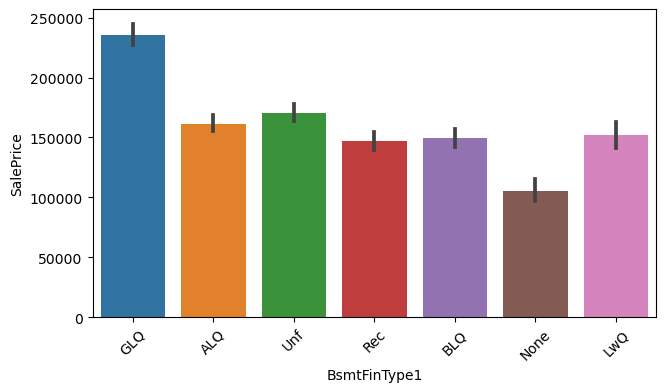

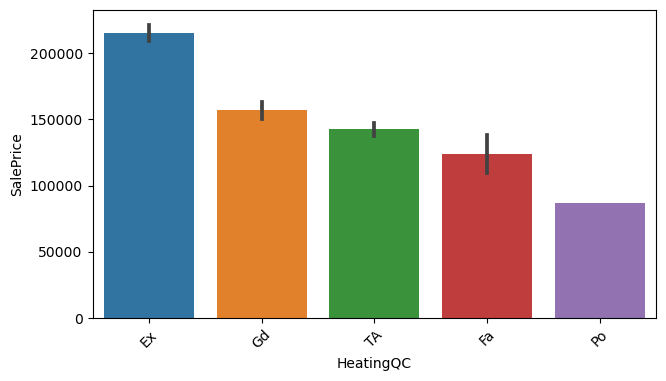

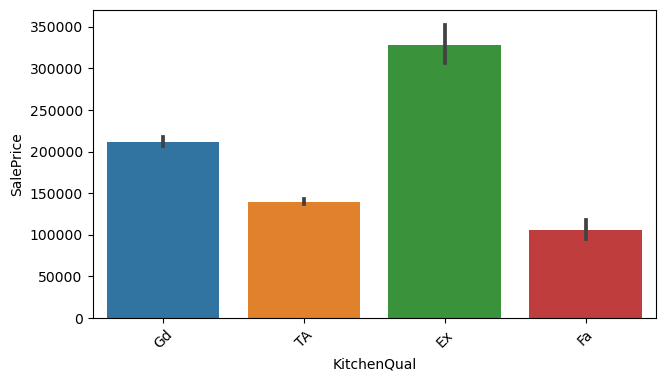

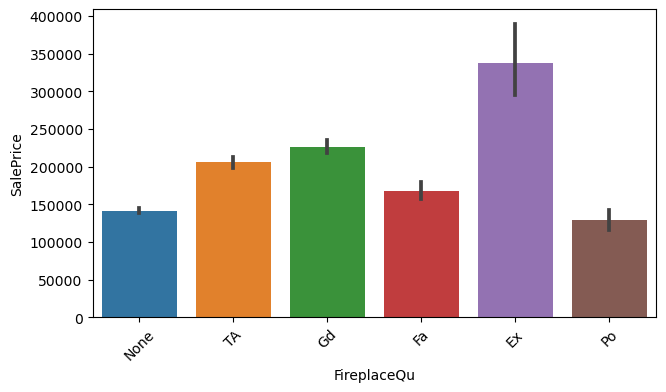

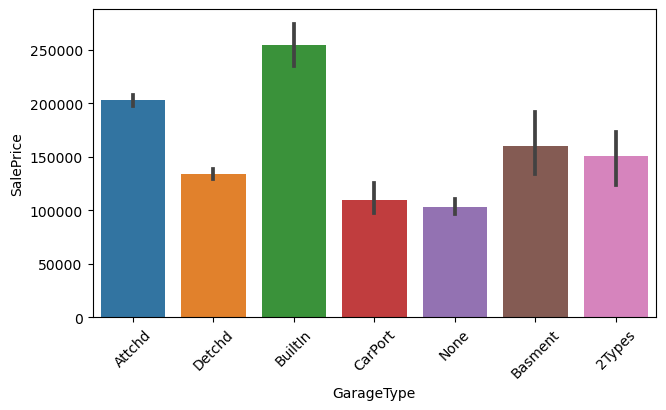

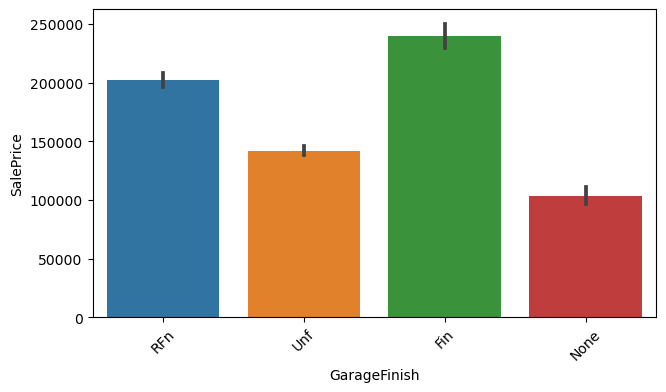

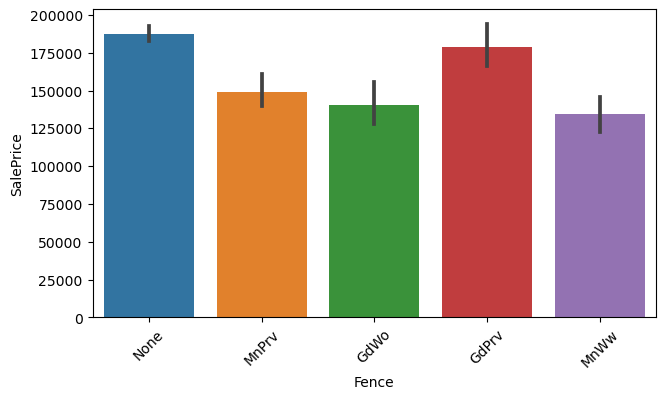

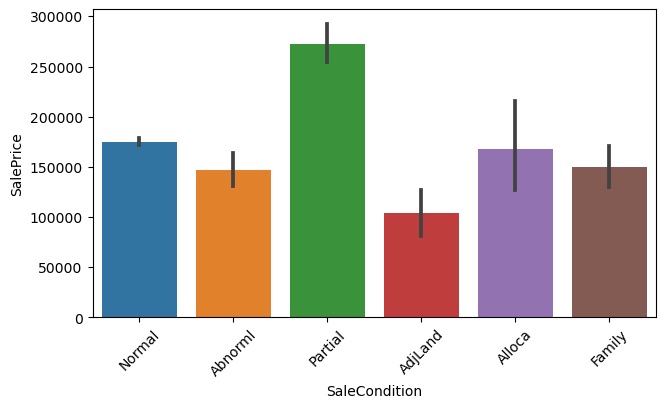

In [24]:
for var in categorical_columns:
    categorical_bar_plots(var)

In [25]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
numeric_cols.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,150,856,856,854,1710,1,2,1,3,8,0,2003.0,2,548,0,61,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,284,1262,1262,0,1262,0,2,0,3,6,1,1976.0,2,460,298,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,434,920,920,866,1786,1,2,1,3,6,1,2001.0,2,608,0,42,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,540,756,961,756,1717,1,1,0,3,7,1,1998.0,3,642,0,35,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,490,1145,1145,1053,2198,1,2,1,4,9,1,2000.0,3,836,192,84,12,2008,250000


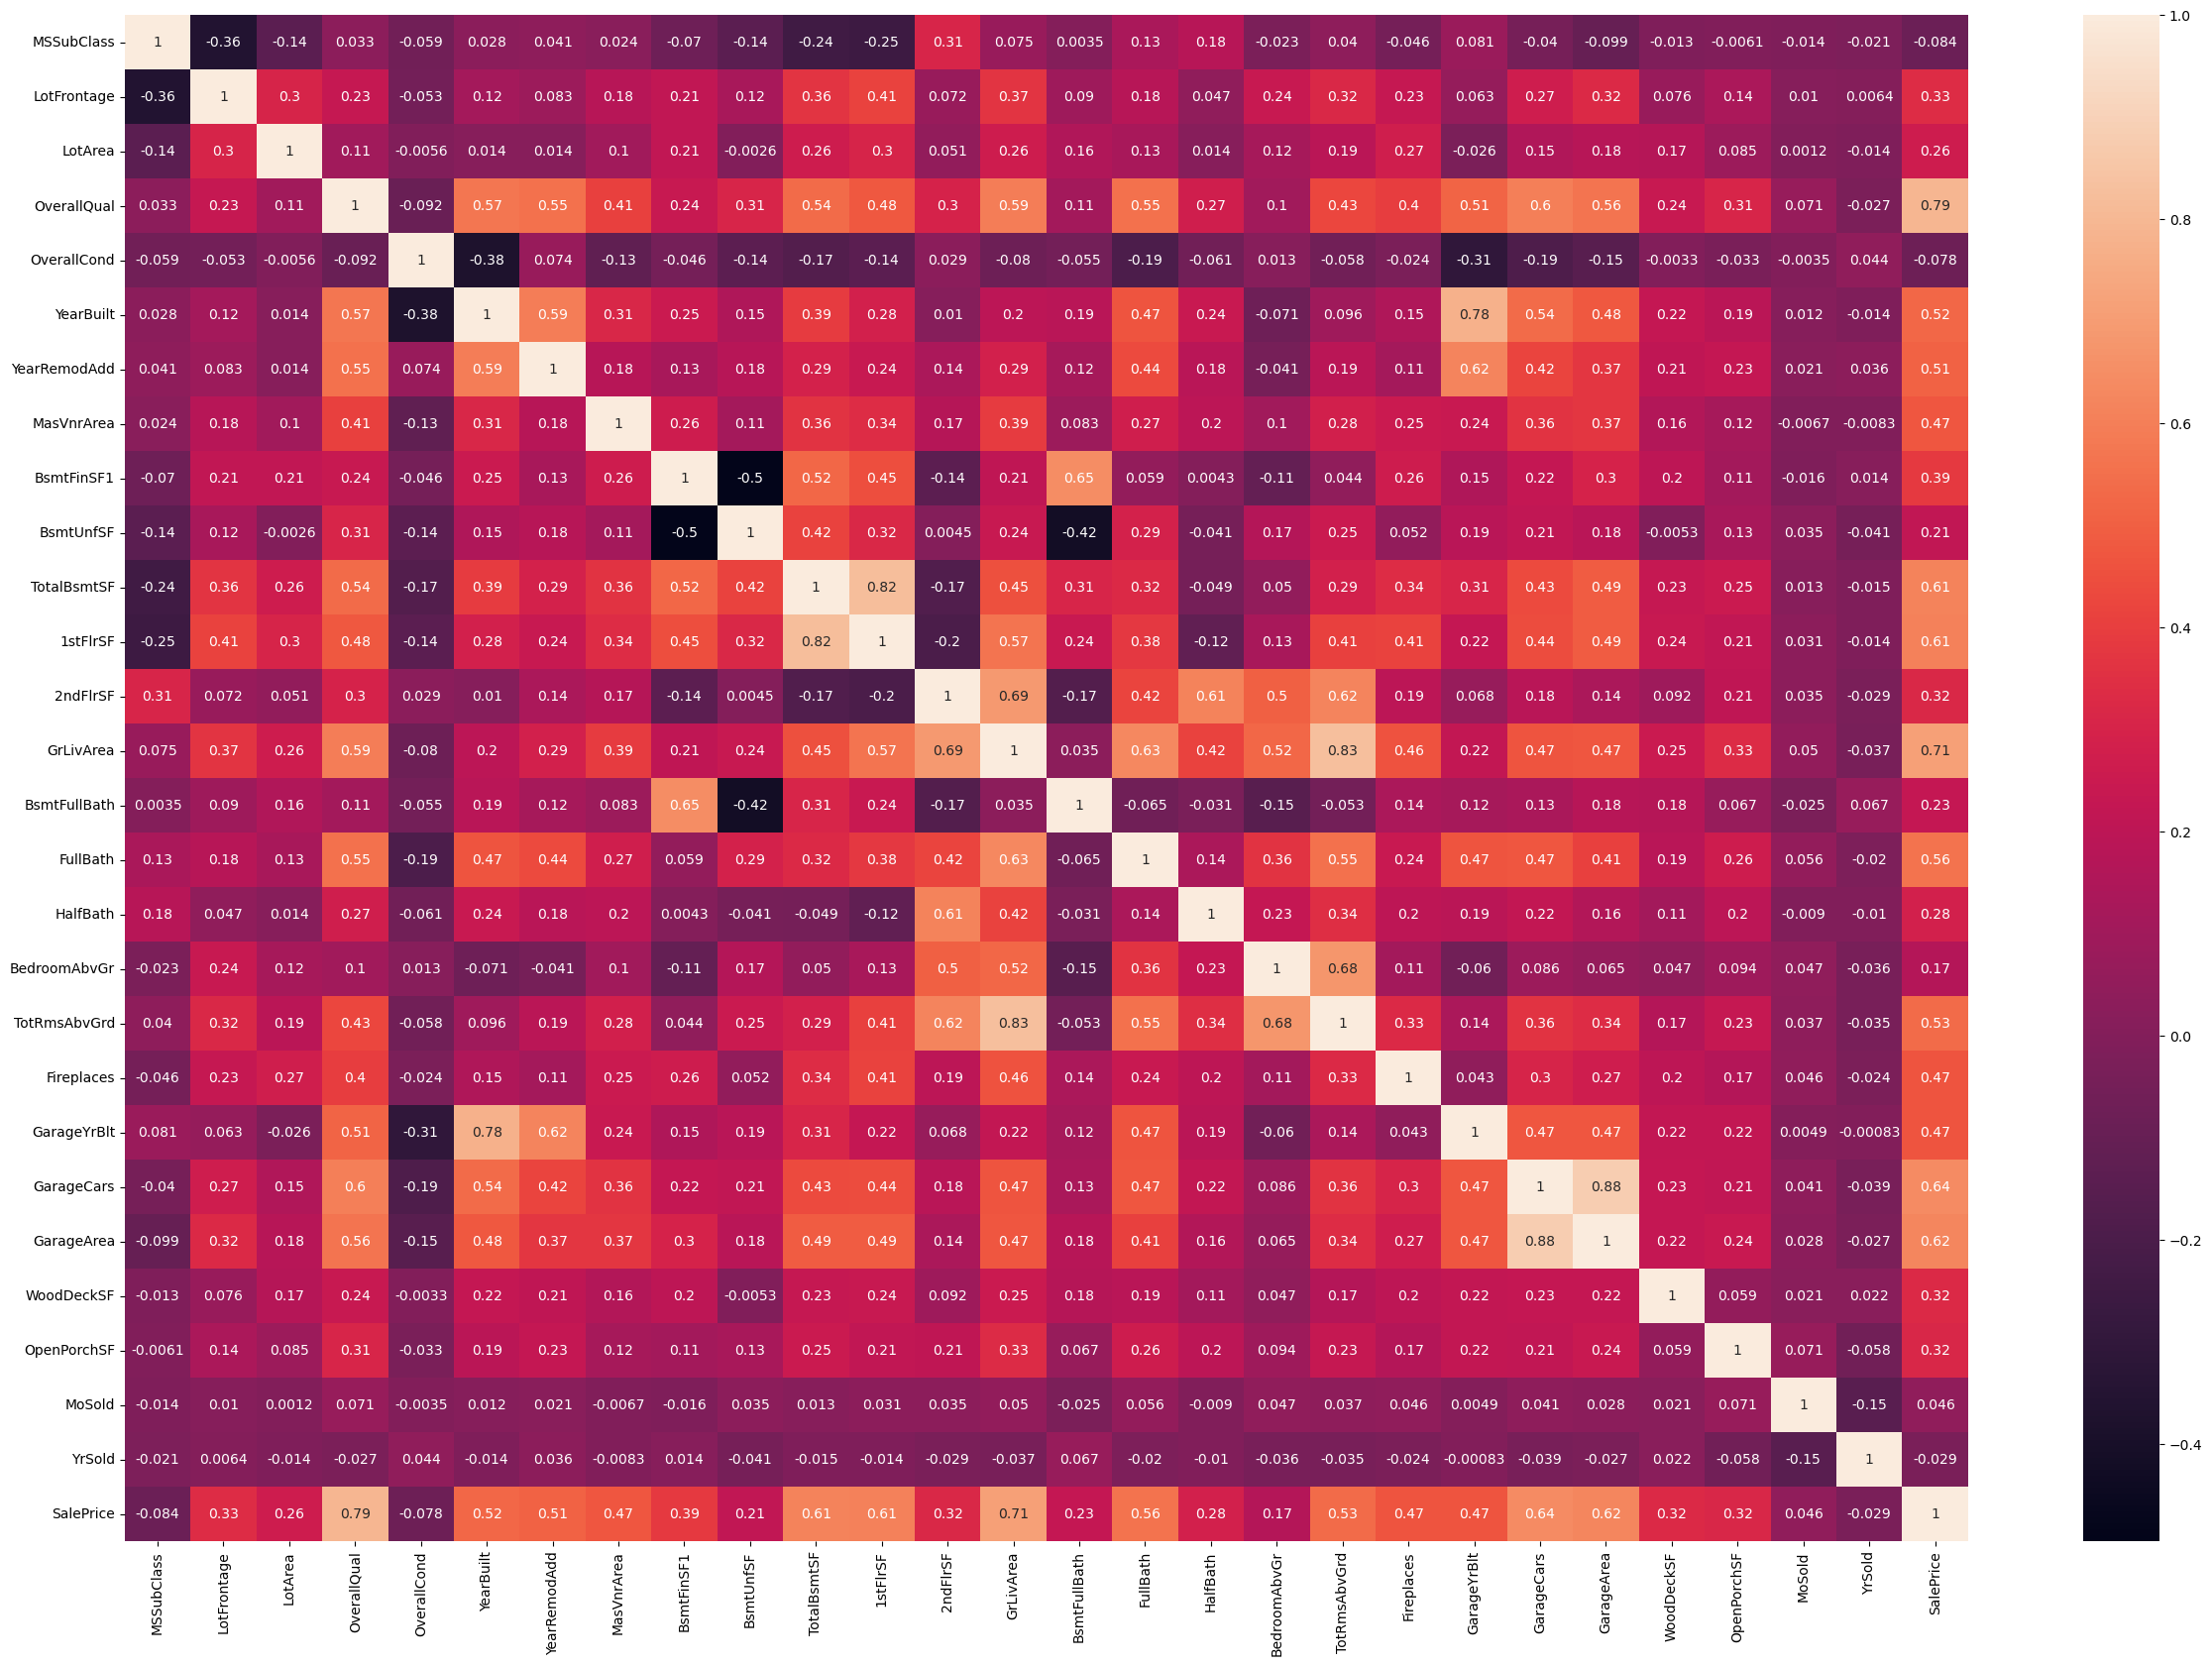

In [26]:
# plotting correlation matrix on heatmap

plt.figure(figsize=(30,20))
sns.heatmap(numeric_cols.corr(),annot=True)
plt.show()

High correlation is observed for some variables in the above heatmap, so we will check their predictive power using pairplots

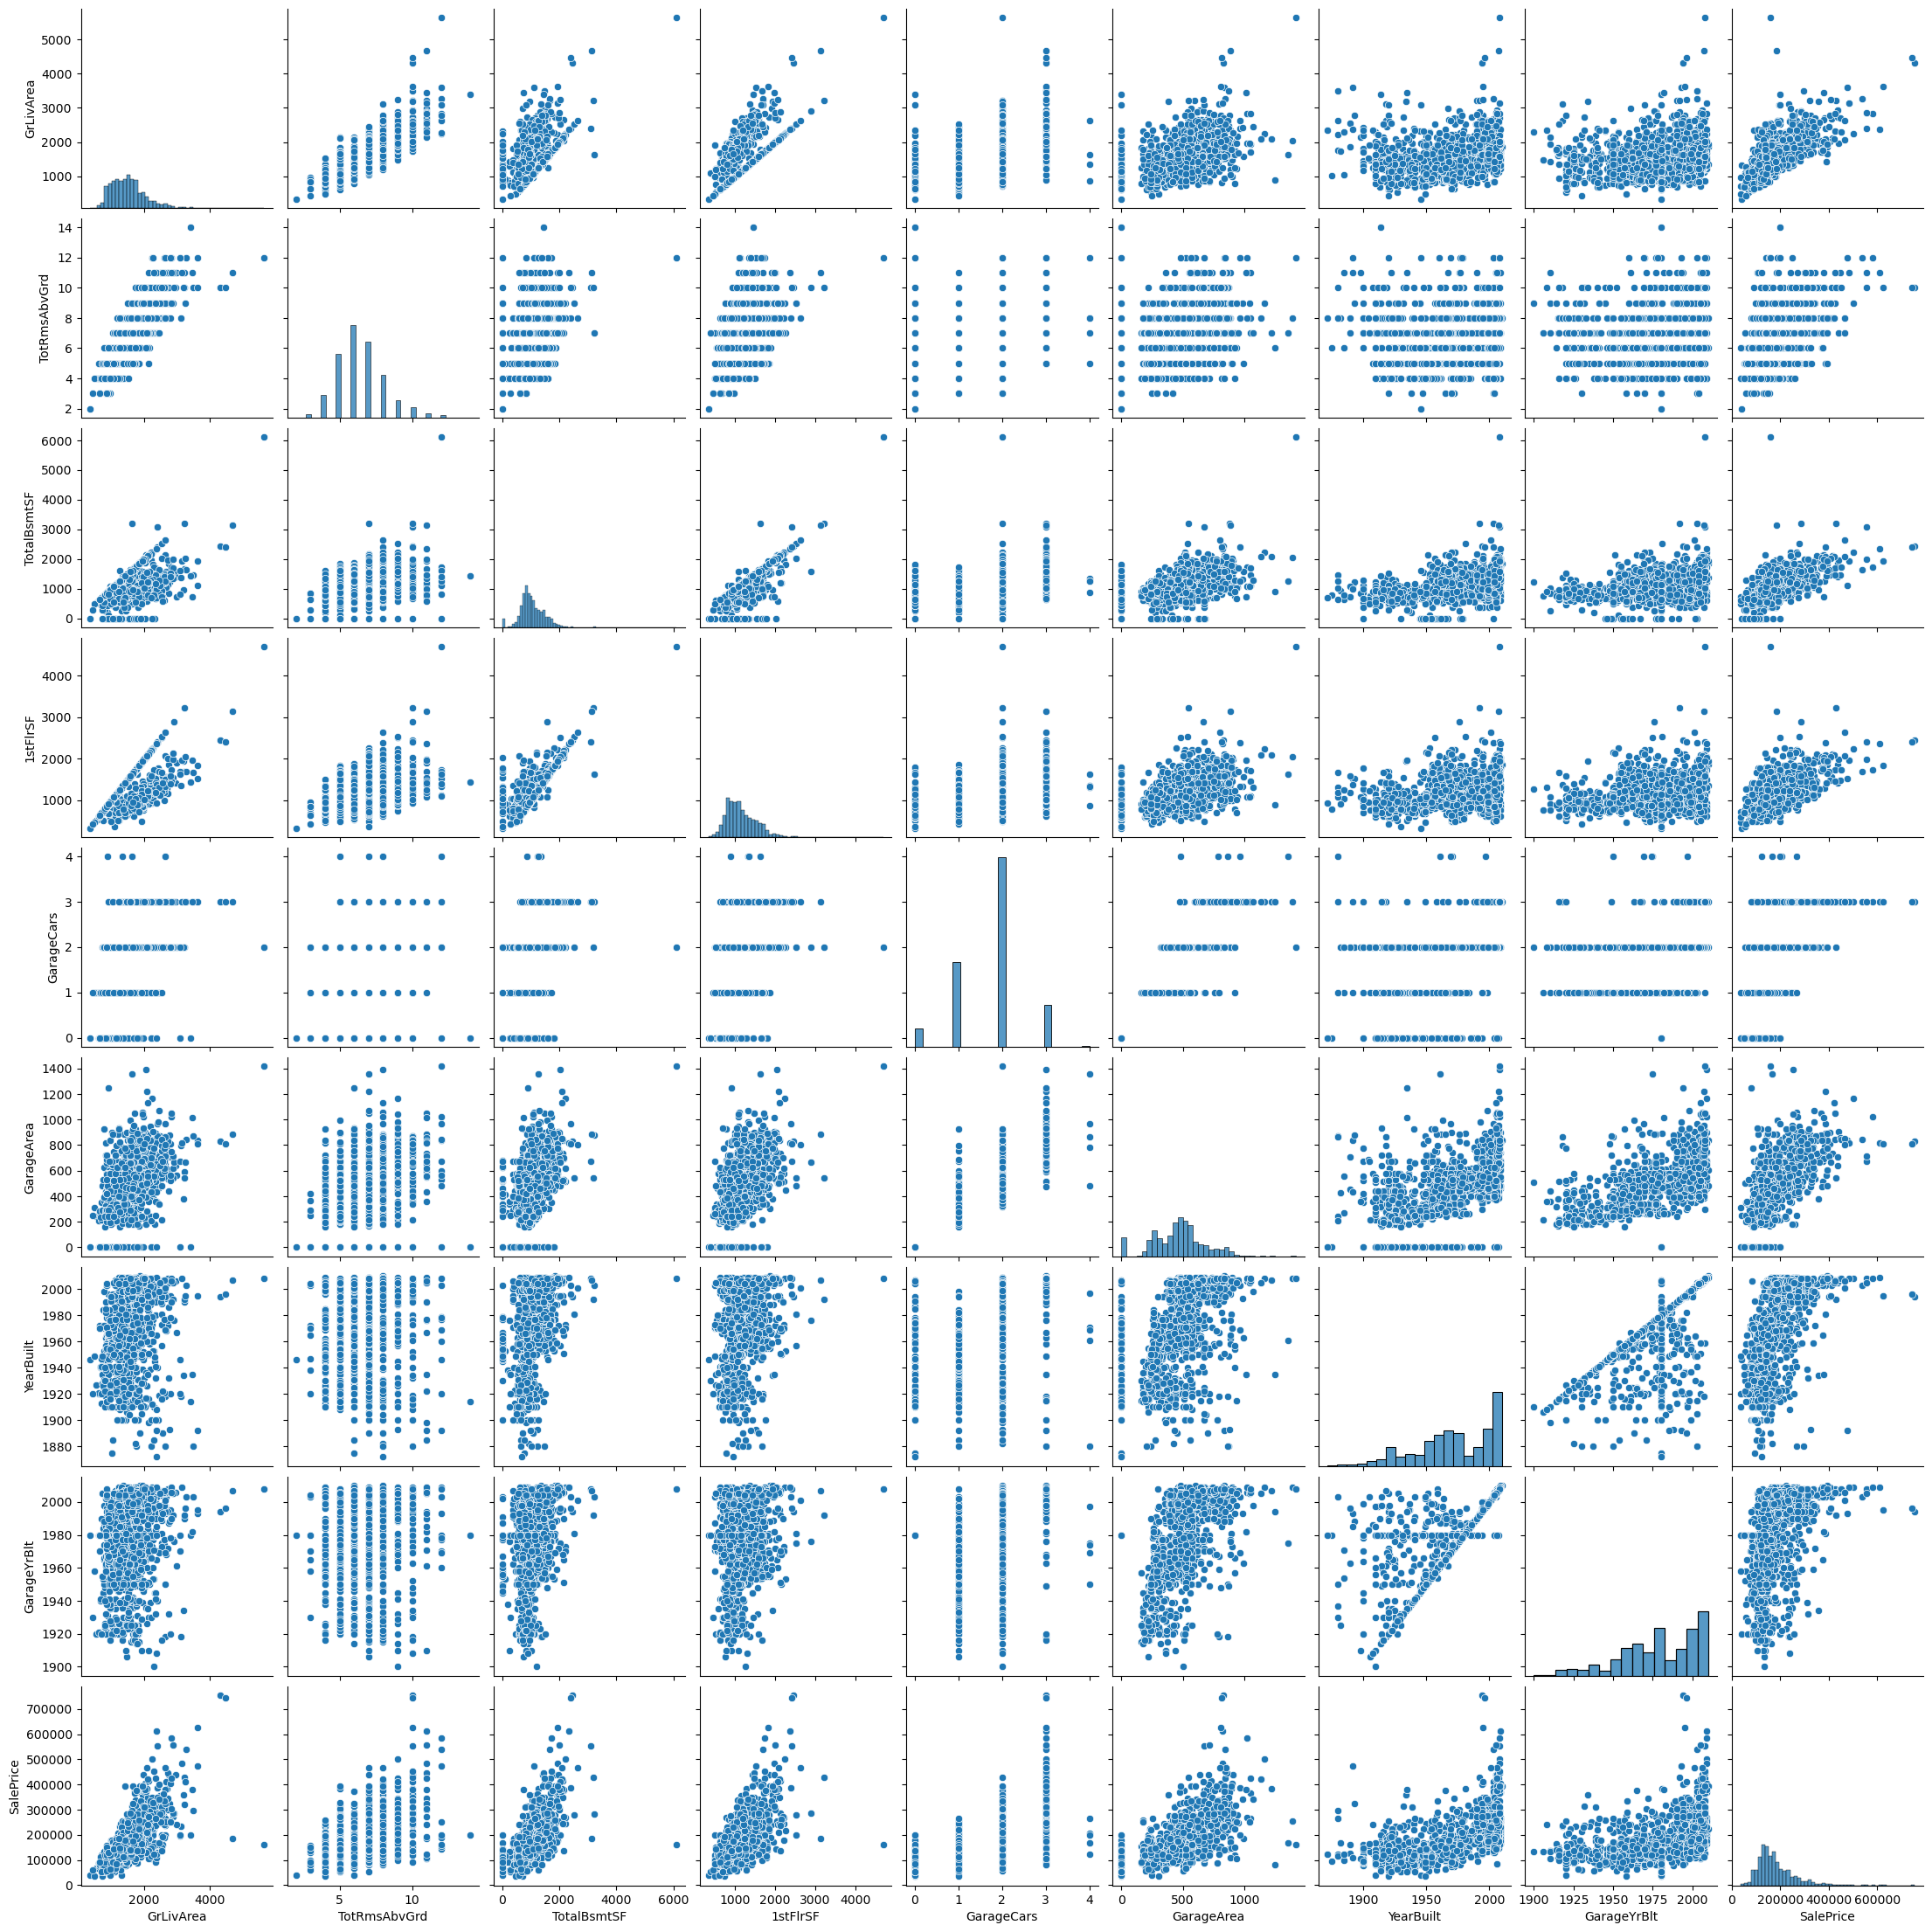

In [27]:
#listing the cols which have high correlation

corr_cols = ['GrLivArea','TotRmsAbvGrd','TotalBsmtSF','1stFlrSF','GarageCars','GarageArea','YearBuilt','GarageYrBlt','SalePrice']
sns.pairplot(df[corr_cols],size=2.5)
plt.show()

In [28]:
#dropping the columns that have high correlation and not contributing to sales price
df.drop(['GarageCars'], axis = 1, inplace=True)
df.drop(['TotRmsAbvGrd'], axis = 1, inplace=True)
df.drop(['GarageYrBlt'], axis = 1, inplace=True)    
df.drop(['1stFlrSF'], axis = 1, inplace=True) 

In [29]:
df.shape

(1460, 46)

### Derived Column 

We can create a new derived column PropertyAge by substracting YrSold from YearBuilt

In [30]:
df['PropertyAge'] = (df['YrSold'] - df['YearBuilt'])

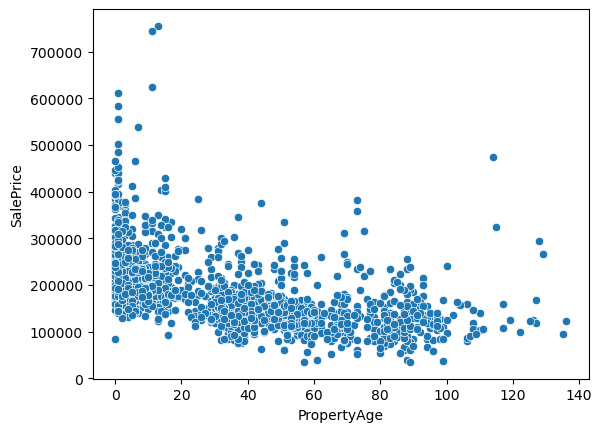

In [31]:
#data visualization Property Age vs Sales Price
sns.scatterplot(x = df['PropertyAge'], y = df['SalePrice'])
plt.show()

The above plot shows that as property age increase there is a decline in sale price

In [32]:
#dropping the below columns as it willnot be required in prediction as we have property age variable
df.drop(['YearBuilt'], axis = 1, inplace=True)
df.drop(['YrSold'], axis = 1, inplace=True)
df.drop(['MoSold'], axis = 1, inplace=True)    
df.drop(['YearRemodAdd'], axis = 1, inplace=True) 

In [33]:
df.shape

(1460, 43)

Lets plot the target variable sales price to observe its distribution

<Axes: xlabel='SalePrice', ylabel='Density'>

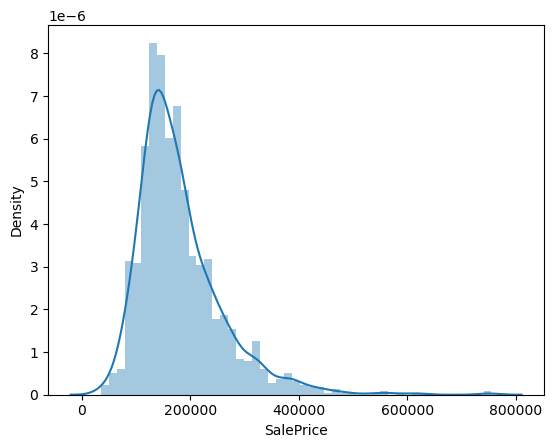

In [34]:
sns.distplot(df['SalePrice'])

It is observed that sale price values are mostly left skewed and also the values are very large. So we will apply log transformation to center the distribution to make it symmetrical and also it will help in getting smaller values of coefficients during modeling and prediction

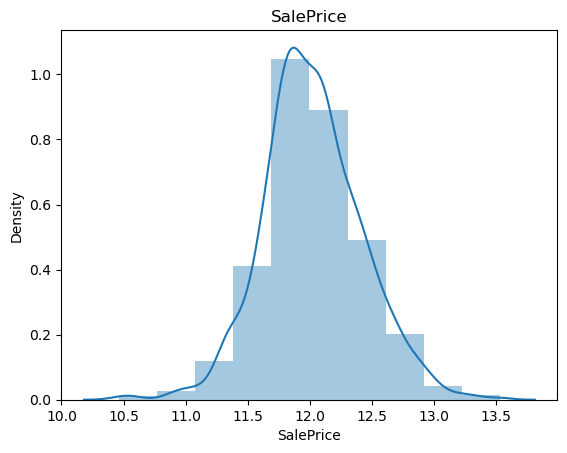

In [35]:
#  SalePrice after transforming the sales price applying log transformation

df['SalePrice'] = np.log1p(df['SalePrice'])

plt.title('SalePrice')
sns.distplot(df['SalePrice'], bins=10)
plt.show()

Now the sale price distribution is centered and symmetric after applying log transformation

### EDA Inferences:
 - Numerical variables such GrLivArea and GarageArea show a linear pattern with sales price and they increase with increase in sales price
 - Derived column propertyAge shows a inverse relationship with sale price. As property age increases, sale price decreases
 - Categorical columns such as MSZoning, KitchenQual, Neighborhood can be important variables for determining sales price

## Data Preparation

There are some orderered categorical variables, we will use label encoding to convert them to numeric from ordered categorical

In [36]:
#  label encoding to convert them to numeric from ordered categorical
df['LotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df['ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df['HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
df['GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
df['BldgType'] = df['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
df['HouseStyle'] = df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
df['Fence'] = df['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
df['LotConfig'] = df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })

We will use one hot encoding to convert the remaining unordered categorical variables to numeric 

In [37]:
#creating dummy columns to convert unordered categorical variables to numerical
df = pd.get_dummies(df, drop_first=True, dtype=int)
df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SalePrice,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,5,1,4,7,5,196.0,4,4,1,6,706,150,856,5,854,1710,1,2,1,3,4,0,0,2,548,0,61,0,12.247699,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,20,80.0,9600,3,2,1,1,6,8,0.0,3,4,4,5,978,284,1262,5,0,1262,0,2,0,3,3,1,3,2,460,298,0,0,12.109016,31,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,60,68.0,11250,2,5,1,4,7,5,162.0,4,4,2,6,486,434,920,5,866,1786,1,2,1,3,4,1,3,2,608,0,42,0,12.317171,7,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,70,60.0,9550,2,4,1,4,7,5,0.0,3,3,1,5,216,540,756,4,756,1717,1,1,0,3,4,1,4,1,642,0,35,0,11.849405,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,60,84.0,14260,2,2,1,4,8,5,350.0,4,4,3,6,655,490,1145,5,1053,2198,1,2,1,4,4,1,3,2,836,192,84,0,12.429220,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [38]:
df.shape

(1460, 115)

## Test Train Split

In [39]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [40]:
df_train.shape

(1021, 115)

In [41]:
df_test.shape

(438, 115)

### Scaling the features

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
#finding the numeric columns to be scaled
scale_cols = df.select_dtypes(include=['int64', 'float']).columns
scale_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Fence', 'SalePrice', 'PropertyAge'], dtype='object')

In [44]:
scaler = MinMaxScaler()

In [45]:
df_train[scale_cols] = scaler.fit_transform(df_train[scale_cols])
df_test[scale_cols] = scaler.transform(df_test[scale_cols])

In [46]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SalePrice,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.226134,0.166249,0.042143,0.862227,0.894466,0.119980,0.238282,0.565676,0.572723,0.065306,0.466210,0.695788,0.415034,0.598433,0.079337,0.241388,0.173773,0.787218,0.165943,0.207345,0.146588,0.522037,0.188051,0.356881,0.503754,0.199151,0.359060,0.570356,0.332545,0.107894,0.089690,0.115573,0.508074,0.268883,0.044074,0.012733,0.785504,0.150833,0.000979,0.011753,0.038198,0.019589,0.098923,0.031342,0.075416,0.051910,0.028404,0.008815,0.037218,0.151812,0.005877,0.045054,0.033301,0.057786,0.077375,0.018609,0.047992,0.044074,0.058766,0.012733,0.021548,0.010774,0.795299,0.002938,0.186092,0.005877,0.001959,0.000979,0.001959,0.029383,0.000979,0.036239,0.154750,0.000979,0.167483,0.073457,0.001959,0.020568

In [47]:
df_test.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SalePrice,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.0,438.0,438.0,438.000000,438.0,438.000000,438.000000,438.0,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,0.195810,0.169716,0.042633,0.868341,0.900114,0.090753,0.232224,0.568493,0.570205,0.062596,0.462709,0.702283,0.389269,0.572679,0.076725,0.246481,0.171395,0.783676,0.172315,0.206127,0.130137,0.520548,0.198630,0.361587,0.504566,0.216134,0.378539,0.576104,0.335935,0.114582,0.087749,0.143265,0.509735,0.268819,0.045662,0.006849,0.794521,0.146119,0.002283,0.009132,0.043379,0.018265,0.111872,0.043379,0.052511,0.059361,0.018265,0.018265,0.025114,0.159817,0.006849,0.061644,0.013699,0.041096,0.077626,0.013699,0.057078,0.031963,0.059361,0.027397,0.036530,0.0,0.748858,0.018265,0.219178,0.002283,0.0,0.0,0.0,0.045662,0.0,0.054795,0.146119,0.0,0.109589,0.075342,0.0,0.009132,0.381279,0.152968,0.013699,0.004566,0.004566,0.020548,0.0,0.052511,0.139269,0.004566,0.105023,0.002283,0.102740,0.004566,0.011416,0.374429,0.143836,0.013699,0.310502,0.600457,0.077626,

## Model Building 

In [48]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [49]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [50]:
df_train.shape

(1021, 114)

### Recursive Feature Elimination

We are going with recursive feature elimination in the beginning as we have 114 columns and we want to select 50 features out of them for model building 

In [51]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select=50)            
rfe = rfe.fit(X_train, y_train)

In [52]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotFrontage,True,1
2,LotArea,True,1
3,BldgType,True,1
4,HouseStyle,True,1
5,OverallQual,True,1
6,OverallCond,True,1
7,BsmtQual,True,1
8,BsmtExposure,True,1
9,BsmtFinType1,True,1


In [53]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [54]:
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [55]:
lr_model = lm.fit(X_train_rfe, y_train)

In [56]:
y_train_pred = lr_model.predict(X_train_rfe)
X_test_rfe = X_test[col]
y_test_pred = lr_model.predict(X_test_rfe)

In [57]:
metrics1 = []

print(f'R2_Score Train : {r2_score(y_train, y_train_pred)}')
print(f'R2_Score Test : {r2_score(y_test, y_test_pred)}')
metrics1.append(r2_score(y_train, y_train_pred))
metrics1.append(r2_score(y_test, y_test_pred))

print(f'RSS-Train : {np.sum(np.square(y_train-y_train_pred))}')
print(f'RSS-Test : {np.sum(np.square(y_test-y_test_pred))}')
metrics1.append(np.sum(np.square(y_train-y_train_pred)))
metrics1.append(np.sum(np.square(y_test-y_test_pred)))

print(f'RMSE-Train : {mean_squared_error(y_train, y_train_pred)}')
print(f'RMSE-Test : {mean_squared_error(y_test, y_test_pred)}')
metrics1.append(mean_squared_error(y_train, y_train_pred))
metrics1.append(mean_squared_error(y_test, y_test_pred))

R2_Score Train : 0.9028382528109535
R2_Score Test : 0.8804254950296586
RSS-Train : 1.6499794609856258
RSS-Test : 0.9118290980805255
RMSE-Train : 0.0016160425670770087
RMSE-Test : 0.002081801593791154


### Ridge Regression

In [58]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
ridge_model_cv.best_params_

{'alpha': 0.2}

In [60]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=4]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
4,0.2,-0.027614,-0.030456,1
3,0.1,-0.027527,-0.030464,2
5,0.3,-0.027702,-0.030465,3
6,0.4,-0.027790,-0.030483,4
2,0.01,-0.027460,-0.030503,5
1,0.001,-0.027455,-0.030508,6
7,0.5,-0.027882,-0.030509,7
0,0.0001,-0.027455,-0.030509,8
8,0.6,-0.027975,-0.030541,9
9,0.7,-0.028066,-0.030592,10


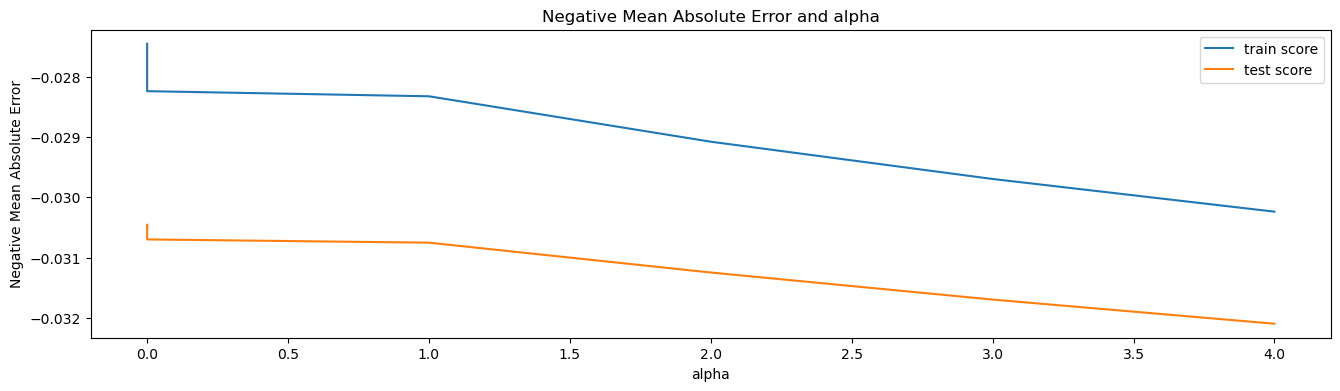

In [61]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,4)) 
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [62]:
alpha = ridge_model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01903517, -0.06863603,  0.09545796, -0.02689221, -0.01657322,
        0.17299516,  0.10015291,  0.0507121 ,  0.03317655,  0.02625439,
       -0.04754973,  0.02103319, -0.02101064,  0.32983419,  0.05075529,
        0.04961097,  0.02351975,  0.05453623,  0.02792458,  0.02889539,
        0.02338625,  0.07588256,  0.01979432, -0.05654873,  0.09812138,
        0.11392544,  0.11041265,  0.09684108, -0.02377105,  0.03854081,
        0.05686722, -0.0212298 , -0.02001613, -0.03936426,  0.04227344,
        0.05022063,  0.04030892,  0.04681983,  0.03166225, -0.06766932,
        0.02785636, -0.01695979, -0.01695979, -0.02510287, -0.02308019,
        0.01711351,  0.01952309,  0.03761213,  0.05318283,  0.03866188])

In [63]:
y_ridge_pred_train = ridge.predict(X_train)
y_ridge_pred_test = ridge.predict(X_test)
 

metrics2 = []

print(f'R2_Score Train : {r2_score(y_train, y_ridge_pred_train)}')
print(f'R2_Score Test : {r2_score(y_test, y_ridge_pred_test)}')
metrics2.append(r2_score(y_train, y_ridge_pred_train))
metrics2.append(r2_score(y_test, y_ridge_pred_test))

print(f'RSS-Train : {np.sum(np.square(y_train-y_ridge_pred_train))}')
print(f'RSS-Test : {np.sum(np.square(y_test-y_ridge_pred_test))}')
metrics2.append(np.sum(np.square(y_train-y_ridge_pred_train)))
metrics2.append(np.sum(np.square(y_test-y_ridge_pred_test)))

print(f'RMSE-Train : {mean_squared_error(y_train, y_ridge_pred_train)}')
print(f'RMSE-Test : {mean_squared_error(y_test, y_ridge_pred_test)}')
metrics2.append(mean_squared_error(y_train, y_ridge_pred_train))
metrics2.append(mean_squared_error(y_test, y_ridge_pred_test))

R2_Score Train : 0.9025826503822703
R2_Score Test : 0.8801656385016083
RSS-Train : 1.6543200453174915
RSS-Test : 0.913810663830358
RMSE-Train : 0.0016202938739642424
RMSE-Test : 0.0020863257165076666


In [64]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.sort_values(by='Coefficient',ascending=False)

,Features,Coefficient
13,GrLivArea,0.3298
5,OverallQual,0.1730
25,MSZoning_RH,0.1139
26,MSZoning_RL,0.1104
6,OverallCond,0.1002
24,MSZoning_FV,0.0981
27,MSZoning_RM,0.0968
2,LotArea,0.0955
21,GarageArea,0.0759
30,Neighborhood_Crawfor,0.0569


### Lasso Regression

In [65]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

folds = 5
lasso_model_cv = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:

lasso_model_cv.best_params_

{'alpha': 0.0001}

In [67]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results = lasso_cv_results[lasso_cv_results['param_alpha']<=0.01]
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.027625,-0.030072,1
1,0.001,-0.033676,-0.034740,2
2,0.01,-0.067725,-0.067982,3


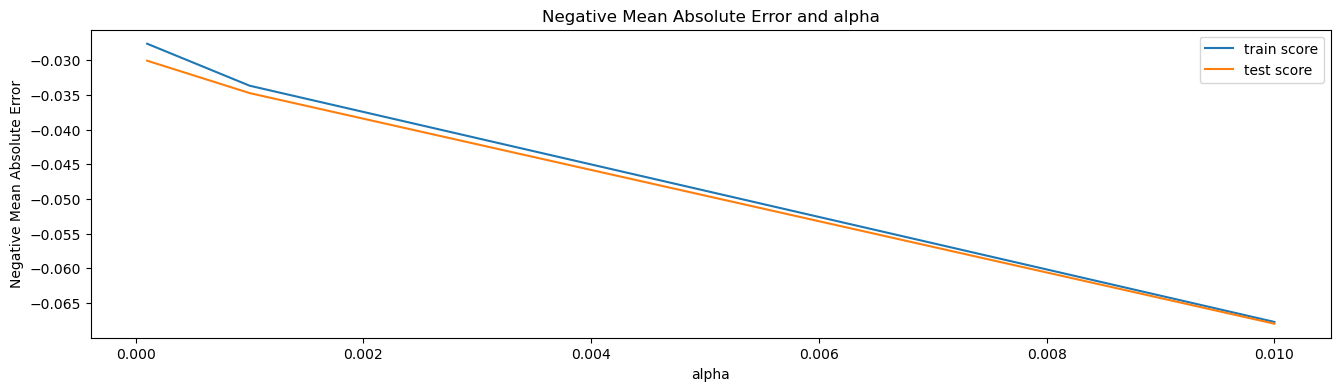

In [68]:
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting
plt.figure(figsize=(16,4)) 
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [69]:
alpha =  lasso_model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.01869173, -0.02876294,  0.04830032, -0.02166845, -0.01749382,
        0.17992664,  0.10273395,  0.03704368,  0.03310527,  0.02066083,
       -0.        ,  0.01923064, -0.00204265,  0.31449329,  0.0460808 ,
        0.04599982,  0.01611665,  0.04140372,  0.02817983,  0.02997801,
        0.02193008,  0.07331936,  0.01914535, -0.06853762,  0.04466269,
        0.05584139,  0.06056312,  0.04205418, -0.01355353,  0.03633351,
        0.04994115, -0.02330964, -0.0242151 , -0.02422963,  0.03488946,
        0.04395609,  0.03806421,  0.03560092,  0.02242265, -0.01573109,
        0.02946083, -0.        , -0.        , -0.02176128, -0.01830481,
        0.00709876,  0.01173757,  0.01138162,  0.01385019,  0.        ])

In [70]:
max_coef = max(lasso.coef_)
min_coef = min(lasso.coef_)

len(lasso.coef_[(lasso.coef_ > min_coef) & (lasso.coef_ < max_coef) & (lasso.coef_  != 0)])

44

In [71]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_lasso_pred_train = lasso.predict(X_train)
y_lasso_pred_test = lasso.predict(X_test)

metrics3 = []

print(f'R2_Score Train : {r2_score(y_train, y_lasso_pred_train)}')
print(f'R2_Score Test : {r2_score(y_test, y_lasso_pred_test)}')
metrics3.append(r2_score(y_train, y_lasso_pred_train))
metrics3.append(r2_score(y_test, y_lasso_pred_test))

print(f'RSS-Train : {np.sum(np.square(y_train-y_lasso_pred_train))}')
print(f'RSS-Test : {np.sum(np.square(y_test-y_lasso_pred_test))}')
metrics3.append(np.sum(np.square(y_train-y_lasso_pred_train)))
metrics3.append(np.sum(np.square(y_test-y_lasso_pred_test)))

print(f'RMSE-Train : {mean_squared_error(y_train, y_lasso_pred_train)}')
print(f'RMSE-Test : {mean_squared_error(y_test, y_lasso_pred_test)}')
metrics3.append(mean_squared_error(y_train, y_lasso_pred_train))
metrics3.append(mean_squared_error(y_test, y_lasso_pred_test))

R2_Score Train : 0.8980605325459369
R2_Score Test : 0.8818760385732562
RSS-Train : 1.7311136576800727
RSS-Test : 0.9007678119692994
RMSE-Train : 0.0016955079898923336
RMSE-Test : 0.0020565475159116425


In [72]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values(by='Coefficient',ascending=False)

,Features,Coefficient
13,GrLivArea,0.3145
5,OverallQual,0.1799
6,OverallCond,0.1027
21,GarageArea,0.0733
26,MSZoning_RL,0.0606
25,MSZoning_RH,0.0558
30,Neighborhood_Crawfor,0.0499
2,LotArea,0.0483
14,BsmtFullBath,0.0461
15,FullBath,0.0460


## Model Evaluation

### Linear Regression

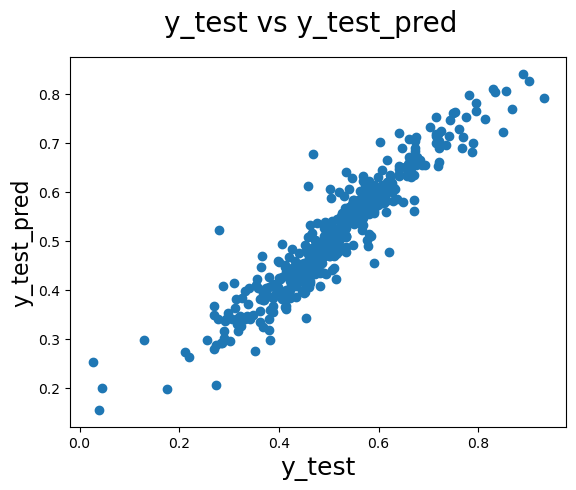

In [73]:
# Plotting y_test and y_test_pred to understand the spread for linear regression
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20) # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

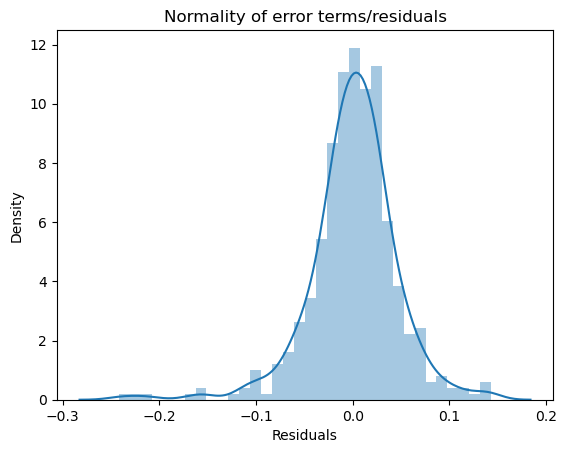

In [74]:
y_res=y_test-y_test_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Ridge Regression

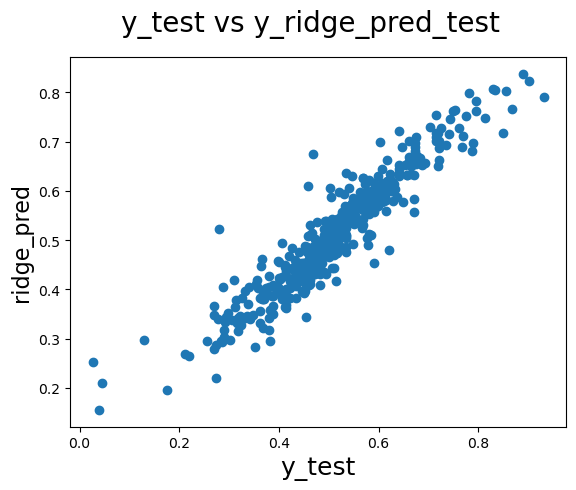

In [75]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,y_ridge_pred_test)
fig.suptitle('y_test vs y_ridge_pred_test', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

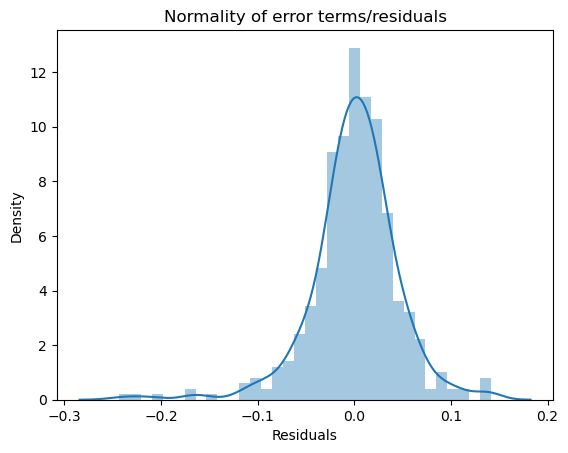

In [76]:
y_res=y_test-y_ridge_pred_test
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Lasso Regression

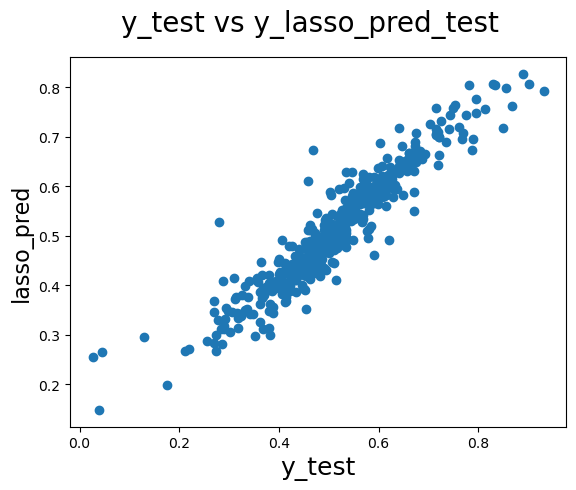

In [77]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,y_lasso_pred_test)
fig.suptitle('y_test vs y_lasso_pred_test', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

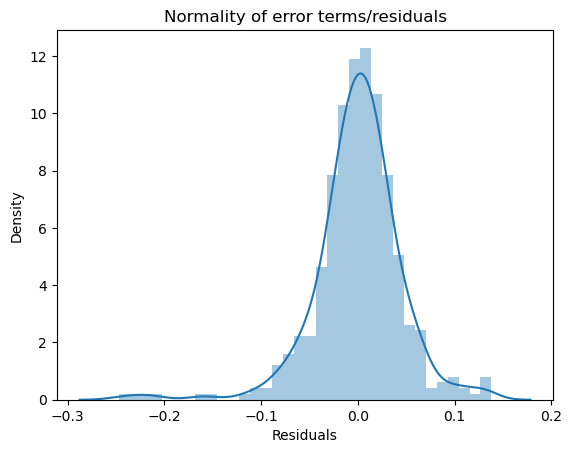

In [78]:
y_res=y_test-y_lasso_pred_test
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

#### Which variables are significant in predicting the price of a house?




In [79]:
## As per lasso regression below are the features and the coefficients that would be helpful in predicting the price of the house
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
newdf = lasso_df.sort_values(by='Coefficient',ascending=False).head(10)
newdf

,Features,Coefficient
13,GrLivArea,0.3145
5,OverallQual,0.1799
6,OverallCond,0.1027
21,GarageArea,0.0733
26,MSZoning_RL,0.0606
25,MSZoning_RH,0.0558
30,Neighborhood_Crawfor,0.0499
2,LotArea,0.0483
14,BsmtFullBath,0.0461
15,FullBath,0.0460


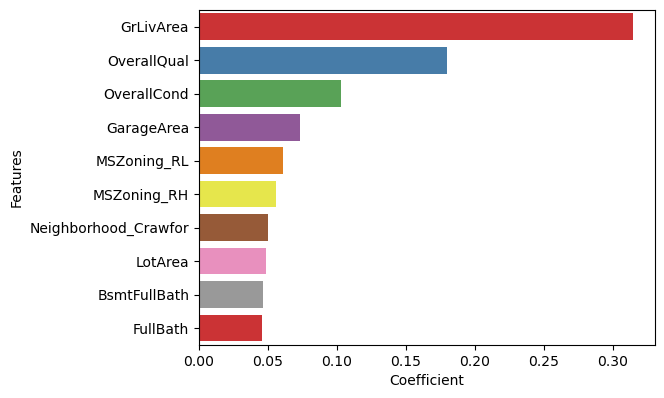

In [80]:
#plotting a barplot to visualize the features that would affect the pricing
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = newdf)
plt.show()

The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price of a house.

#### How well those variables describe the price of a house?


- The optimal lambda value in case of Ridge and Lasso is as below:
    - Ridge - 0.2
    - Lasso - 0.0001
    
- The Mean Squared error in case of Ridge and Lasso are:
    - Ridge - 0.002086
    - Lasso - 0.002057

- The Mean Squared Error of Lasso is slightly lower than that of Ridge

- Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a 
  better edge over Ridge.
  
- Hence based on Lasso, the factors that generally affect the price are the Zoning classification, Living area
  square feet, Overall quality and condition of the house, Lot size in square feet, Garage Area, basement full bathrooms,Full bathrooms above grade

    
Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the 
price of a house.

#### The equation based on the most significant predictor variables would be:

#### Log ( Sale Price) = 0.3145 * GrLivArea + 0.1799 * OverallQual + 0.1027 * OverallCond + 0.0733 * GarageArea + 0.0606 * MSZoning_RL + 0.0558 * MSZoning_RH + 0.0499 * Neighborhood_Crawfor + 0.0483 * LotArea + 0.0461 * BsmtFullBath + 0.0460 * FullBath 	



### Summary of all Metrics

In [81]:
# creating a table with all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metrics1
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metrics2, name = 'Ridge Regression')
ls_metric = pd.Series(metrics3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.902838,0.902583,0.898061
1,R2 Score (Test),0.880425,0.880166,0.881876
2,RSS (Train),1.649979,1.654320,1.731114
3,RSS (Test),0.911829,0.913811,0.900768
4,MSE (Train),0.001616,0.001620,0.001696
5,MSE (Test),0.002082,0.002086,0.002057


### Comparision of coefficients of features between Ridge and Lasso

In [82]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge,Lasso
MSSubClass,-0.019035,-0.018692
LotFrontage,-0.068636,-0.028763
LotArea,0.095458,0.048300
BldgType,-0.026892,-0.021668
HouseStyle,-0.016573,-0.017494
OverallQual,0.172995,0.179927
OverallCond,0.100153,0.102734
BsmtQual,0.050712,0.037044
BsmtExposure,0.033177,0.033105
BsmtFinType1,0.026254,0.020661


## Problem Statement Part 2

### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

The optimal lambda value in case of Ridge and Lasso is as below:

    Ridge - 0.2
    Lasso - 0.0001

Choosing double the value of alpha 

### Ridge Regression

In [83]:
alpha = 0.4
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train,y_train)

Ridge(alpha=0.4)

In [84]:
# calculating the metrics again with new values of alpha
y_ridge2_pred_train = ridge2.predict(X_train)
y_ridge2_pred_test = ridge2.predict(X_test)
 

metrics2_new = []

print(f'R2_Score Train : {r2_score(y_train, y_ridge2_pred_train)}')
print(f'R2_Score Test : {r2_score(y_test, y_ridge2_pred_test)}')
metrics2_new.append(r2_score(y_train, y_ridge2_pred_train))
metrics2_new.append(r2_score(y_test, y_ridge2_pred_test))

print(f'RSS-Train : {np.sum(np.square(y_train-y_ridge2_pred_train))}')
print(f'RSS-Test : {np.sum(np.square(y_test-y_ridge2_pred_test))}')
metrics2_new.append(np.sum(np.square(y_train-y_ridge2_pred_train)))
metrics2_new.append(np.sum(np.square(y_test-y_ridge2_pred_test)))

print(f'RMSE-Train : {mean_squared_error(y_train, y_ridge2_pred_train)}')
print(f'RMSE-Test : {mean_squared_error(y_test, y_ridge2_pred_test)}')
metrics2_new.append(mean_squared_error(y_train, y_ridge2_pred_train))
metrics2_new.append(mean_squared_error(y_test, y_ridge2_pred_test))

R2_Score Train : 0.9020296601467583
R2_Score Test : 0.8796271998942484
RSS-Train : 1.6637108040998019
RSS-Test : 0.9179165891682257
RMSE-Train : 0.0016294914829576904
RMSE-Test : 0.0020956999752699216


In [85]:
ridge_df2 = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge2.coef_.round(4)})
ridge_df2.reset_index(drop=True, inplace=True)
ridge_df2.sort_values(by='Coefficient',ascending=False)

,Features,Coefficient
13,GrLivArea,0.3009
5,OverallQual,0.1740
25,MSZoning_RH,0.1017
26,MSZoning_RL,0.0990
6,OverallCond,0.0990
2,LotArea,0.0882
27,MSZoning_RM,0.0855
24,MSZoning_FV,0.0851
21,GarageArea,0.0773
17,BedroomAbvGr,0.0580


### Lasso Regression

In [86]:
alpha = 0.0002
lasso2 = Lasso(alpha=alpha)
lasso2.fit(X_train,y_train)

Lasso(alpha=0.0002)

In [87]:
max_coef = max(lasso2.coef_)
min_coef = min(lasso2.coef_)

len(lasso2.coef_[(lasso2.coef_ > min_coef) & (lasso2.coef_ < max_coef) & (lasso2.coef_  != 0)])

38

In [88]:
# Lets calculate some metrics such as R2 score, RSS and RMSE with double value of alpha
y_lasso2_pred_train = lasso2.predict(X_train)
y_lasso2_pred_test = lasso2.predict(X_test)

metrics3_new = []

print(f'R2_Score Train : {r2_score(y_train, y_lasso2_pred_train)}')
print(f'R2_Score Test : {r2_score(y_test, y_lasso2_pred_test)}')
metrics3_new.append(r2_score(y_train, y_lasso2_pred_train))
metrics3_new.append(r2_score(y_test, y_lasso2_pred_test))

print(f'RSS-Train : {np.sum(np.square(y_train-y_lasso2_pred_train))}')
print(f'RSS-Test : {np.sum(np.square(y_test-y_lasso2_pred_test))}')
metrics3_new.append(np.sum(np.square(y_train-y_lasso2_pred_train)))
metrics3_new.append(np.sum(np.square(y_test-y_lasso2_pred_test)))

print(f'RMSE-Train : {mean_squared_error(y_train, y_lasso2_pred_train)}')
print(f'RMSE-Test : {mean_squared_error(y_test, y_lasso2_pred_test)}')
metrics3_new.append(mean_squared_error(y_train, y_lasso2_pred_train))
metrics3_new.append(mean_squared_error(y_test, y_lasso2_pred_test))

R2_Score Train : 0.8915910020093061
R2_Score Test : 0.8772583125182806
RSS-Train : 1.8409778050063934
RSS-Test : 0.9359808114706214
RMSE-Train : 0.001803112443688926
RMSE-Test : 0.002136942491942058


In [89]:
lasso_df2 = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso2.coef_.round(4)})
lasso_df2.reset_index(drop=True, inplace=True)
lasso_df2.sort_values(by='Coefficient',ascending=False)

,Features,Coefficient
13,GrLivArea,0.3054
5,OverallQual,0.1862
6,OverallCond,0.1000
21,GarageArea,0.0724
15,FullBath,0.0475
14,BsmtFullBath,0.0459
30,Neighborhood_Crawfor,0.0445
35,Neighborhood_NridgHt,0.0382
36,Neighborhood_Somerst,0.0358
29,Neighborhood_ClearCr,0.0340


In [90]:
#summary of metrics for comparision

# creating a table with all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']       
        }
lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metrics2, name = 'Ridge')
ls_metric = pd.Series(metrics3, name = 'Lasso')
rg_metric2 = pd.Series(metrics2_new, name = 'Ridge2')
ls_metric2 = pd.Series(metrics3_new, name = 'Lasso2')

final_metric2 = pd.concat([lr_metric,rg_metric, ls_metric,rg_metric2,ls_metric2], axis = 1)

final_metric2

,Metric,Ridge,Lasso,Ridge2,Lasso2
0,R2 Score (Train),0.902583,0.898061,0.902030,0.891591
1,R2 Score (Test),0.880166,0.881876,0.879627,0.877258
2,RSS (Train),1.654320,1.731114,1.663711,1.840978
3,RSS (Test),0.913811,0.900768,0.917917,0.935981
4,MSE (Train),0.001620,0.001696,0.001629,0.001803
5,MSE (Test),0.002086,0.002057,0.002096,0.002137


In [91]:
#important predictor variables
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge'] = ridge.coef_
betas['Ridge2'] = ridge2.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso2'] = lasso2.coef_
pd.set_option('display.max_rows', None)
betas.head(10)

,Ridge,Ridge2,Lasso,Lasso2
MSSubClass,-0.019035,-0.019677,-0.018692,-0.016281
LotFrontage,-0.068636,-0.059005,-0.028763,-0.000000
LotArea,0.095458,0.088246,0.048300,0.000481
BldgType,-0.026892,-0.025362,-0.021668,-0.020524
HouseStyle,-0.016573,-0.017184,-0.017494,-0.017127
OverallQual,0.172995,0.174047,0.179927,0.186244
OverallCond,0.100153,0.098954,0.102734,0.099960
BsmtQual,0.050712,0.050642,0.037044,0.029700
BsmtExposure,0.033177,0.033784,0.033105,0.033162
BsmtFinType1,0.026254,0.025159,0.020661,0.020732


### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [92]:
#excluding 5 most important predictor variables
excluded_cols = ['GrLivArea','OverallQual','LotArea','OverallCond','GarageArea']
X_train2 = X_train.drop(excluded_cols,axis=1)
X_test2 = X_test.drop(excluded_cols,axis=1)

In [93]:
X_train2.shape

(1021, 45)

In [94]:
X_test2.shape

(438, 45)

In [95]:
#Lasso regression 

alpha =0.0001
lasso_new = Lasso(alpha=alpha)
lasso_new.fit(X_train2, y_train) 

Lasso(alpha=0.0001)

In [96]:
# Lets calculate some metrics such as R2 score, RSS and RMSE 
y_lasso_new_pred_train = lasso_new.predict(X_train2)
y_lasso_new_pred_test = lasso_new.predict(X_test2)

metrics_lasso_new = []

print(f'R2_Score Train : {r2_score(y_train, y_lasso_new_pred_train)}')
print(f'R2_Score Test : {r2_score(y_test, y_lasso_new_pred_test)}')
metrics_lasso_new.append(r2_score(y_train, y_lasso_new_pred_train))
metrics_lasso_new.append(r2_score(y_test, y_lasso_new_pred_test))

print(f'RSS-Train : {np.sum(np.square(y_train-y_lasso_new_pred_train))}')
print(f'RSS-Test : {np.sum(np.square(y_test-y_lasso_new_pred_test))}')
metrics_lasso_new.append(np.sum(np.square(y_train-y_lasso_new_pred_train)))
metrics_lasso_new.append(np.sum(np.square(y_test-y_lasso_new_pred_test)))

print(f'RMSE-Train : {mean_squared_error(y_train, y_lasso_new_pred_train)}')
print(f'RMSE-Test : {mean_squared_error(y_test, y_lasso_new_pred_test)}')
metrics_lasso_new.append(mean_squared_error(y_train, y_lasso_new_pred_train))
metrics_lasso_new.append(mean_squared_error(y_test, y_lasso_new_pred_test))

R2_Score Train : 0.8452881879001393
R2_Score Test : 0.8083783474809297
RSS-Train : 2.6272820294180104
RSS-Test : 1.4612328826492056
RMSE-Train : 0.0025732439073633795
RMSE-Test : 0.0033361481339022957


In [97]:
lasso_df3 = pd.DataFrame({'Features':X_train2.columns, 'Coefficient':lasso_new.coef_.round(4)})
lasso_df3.reset_index(drop=True, inplace=True)
lasso_df3.sort_values(by='Coefficient',ascending=False)

,Features,Coefficient
11,FullBath,0.1199
13,BedroomAbvGr,0.1054
14,KitchenQual,0.0969
4,BsmtQual,0.0847
21,MSZoning_RL,0.0792
20,MSZoning_RH,0.0785
7,BsmtFinSF1,0.0740
29,Neighborhood_NoRidge,0.0707
32,Neighborhood_StoneBr,0.0700
22,MSZoning_RM,0.0695
